In [ ]:
# -*- coding: utf-8 -*-
"""
#对自己的图片文件做tSNE分类可视化

Created on Mon Dec 30 10:24:13 2019

@author: liujie 
@code source: https://zhuanlan.zhihu.com/p/67491123
"""

import glob
from skimage import io
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn import datasets
from google.colab import drive

drive.mount('/content/drive')

data_dir = "/content/drive/My Drive/Matlab/T1b/20200923/"



#--------------------------------------函数定义-----------------------------
#读取彩色图片,仅支持2级文件夹
def get_data_RGB(path):
    cate=[path+x for x in os.listdir(path) if os.path.isdir(path+x)]
    imgs=[]
    labels=[]
    print("reading:", cate)
    #读取子文件里的图片文件
    #！将循环次数idx赋值给图片的标记label
    for idx,folder in enumerate(cate):
        for im in glob.glob(folder+'/*.jpg'):
            #print('reading the images:%s'%(im))
            #print('reading the image label:%s'%(idx))
            # class_name = folder.split('/')[-1]  #####################################################
            img=cv2.imread(im)
            #将彩色图片灰度化
            img=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
            #将所有的图片resize = 32×32
            img=cv2.resize(img,(32,32))
            #将img numpy格式转为1维度
            img=img.reshape(1024)
            imgs.append(img)
            labels.append(idx)
            # labels.append(class_name)  ######################################################
    return np.asarray(imgs,np.float32),np.asarray(labels,np.int32)
    # return np.asarray(imgs,np.float32), labels     #####################################################

def get_data():
    digits = datasets.load_digits(n_class=6)
    data = digits.data
    label = digits.target
    # n_samples, n_features = data.shape
    # return data, label, n_samples, n_features
    return data, label


#读取灰色图片,仅支持2级文件夹
def get_data_gray(path):
    cate=[path+x for x in os.listdir(path) if os.path.isdir(path+x)]
    imgs=[]
    labels=[]
    print("reading:", cate)
    #读取子文件里的图片文件
    #！将循环次数idx赋值给图片的标记label
    for idx,folder in enumerate(cate):
        # for im in glob.glob(folder+'/*.png'):########################################################################
        for im in glob.glob(folder+'/*.jpg'):
            img=cv2.imread(im)
            #虽然MNIST是灰度的，但是这里不只为什么还是要执行将彩色图片灰度化
            img=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
            #将所有的图片resize = 32×32
            img=cv2.resize(img,(28,28))
            #将img numpy格式转为1维度
            img=img.reshape(784)
            imgs.append(img)
            labels.append(idx)
    return np.asarray(imgs,np.float32),np.asarray(labels,np.int32)

#下面的两个函数，
#一个定义了2维数据，一个定义了3维数据的可视化

def plot_embedding_2D(data, label, title):
    x_min, x_max = np.min(data, 0), np.max(data, 0)
    data = (data - x_min) / (x_max - x_min)
    fig = plt.figure()
    for i in range(data.shape[0]):
        plt.text(data[i, 0], data[i, 1], str(label[i]),
                 color=plt.cm.Set1(label[i]),
                 fontdict={'weight': 'bold', 'size': 9})
    plt.xticks([])
    plt.yticks([])
    plt.title(title)
    return fig

def plot_embedding_3D(data,label,title): 
    x_min, x_max = np.min(data,axis=0), np.max(data,axis=0) 
    data = (data- x_min) / (x_max - x_min) 
    ax = plt.figure().add_subplot(111,projection='3d')
    fig = plt.figure()
    for i in range(data.shape[0]): 
        ax.text(data[i, 0], data[i, 1], data[i,2],str(label[i]), color=plt.cm.Set1(label[i]),fontdict={'weight': 'bold', 'size': 9}) 
    return fig



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


reading: ['/content/drive/My Drive/Matlab/T1b/20200923/T1b', '/content/drive/My Drive/Matlab/T1b/20200923/TisT1a']
Begining......
[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 1612 samples in 0.170s...
[t-SNE] Computed neighbors for 1612 samples in 6.035s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1612
[t-SNE] Computed conditional probabilities for sample 1612 / 1612
[t-SNE] Mean sigma: 261.539821
[t-SNE] KL divergence after 250 iterations with early exaggeration: 101.659683
[t-SNE] KL divergence after 1000 iterations: 3.440690
Finished......


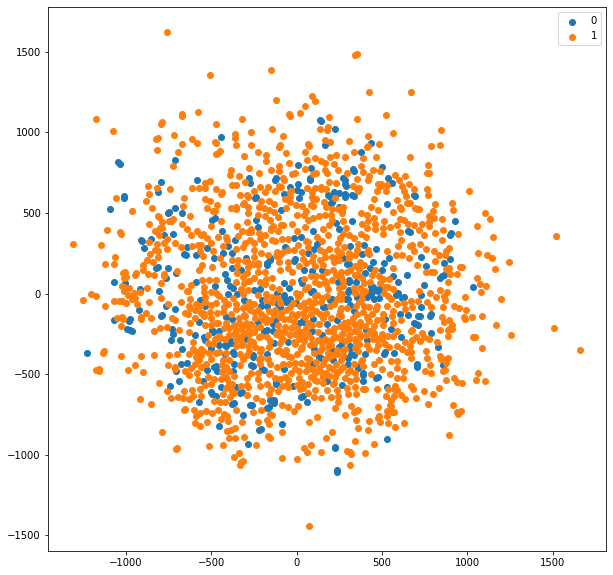

In [ ]:
#主函数
from keras.utils import np_utils

def main():
    data, label = get_data_RGB(data_dir) #根据自己的数据类型更改 ################################################
    # data, label = get_data() #根据自己的数据类型更改 ################################################
    print('Begining......') #时间会较长，所有处理完毕后给出finished提示
    tsne_2D = TSNE(n_components=2, init='pca', random_state=0, verbose=1, perplexity=5, n_iter=1000, learning_rate=10) #调用TSNE
    # tsne_2D = TSNE(n_components=2, init='pca', verbose=1, perplexity=5, n_iter=1000, learning_rate=100) #调用TSNE
    result_2D = tsne_2D.fit_transform(data)
    #tsne_3D = TSNE(n_components=3, init='pca', random_state=0, perplexity=5)
   # result_3D = tsne_3D.fit_transform(data)
    print('Finished......')
    #调用上面的两个函数进行可视化
    plt.figure(figsize=(10,10))
    
    y_test_cat = np_utils.to_categorical(label[:2000], num_classes = 2)# 总的类别 定义采样点的数量·
    color_map = np.argmax(y_test_cat, axis=1)
    for cl in range(2):# 总的类别
      indices = np.where(color_map==cl)
      indices = indices[0]
      plt.scatter(result_2D[indices,0], result_2D[indices, 1], label=cl)
    
    
    
    # fig1 = plot_embedding_2D(result_2D, label,'t-SNE')
    # plt.show(fig1)
    #fig2 = plot_embedding_3D(result_3D, label,'t-SNE')
    #plt.show(fig2)
    plt.legend()
    plt.show()

#--------------------------------------执行-----------------------------
if __name__ == '__main__':
    main()